In [3]:
### INITIALISATION ###
import numpy as np          # fundamental package for scientific computing
import glob                 # return all file paths that match a specific pattern
import os                   # to interact with the operating system
import matplotlib.pyplot as plt
import pickle

time = np.arange(1850,1850+3012/12,1/12)
time_annual = np.arange(1850,1850+3012/12)

# Calculate the annual means by averaging the values in each row
def annual_from_monthly(signal):
    reshaped_data = signal.reshape(-1, 12)
    annual_means = np.mean(reshaped_data, axis=1)
    return annual_means

# find the corresponding number in the bsf list
def find_corresponding_bsf_number(vvel_number_to_find):
    with open(os.path.expanduser('~/phase1_CONDA/timeseries/order_bsf.txt'), 'r') as file:
        bsf_list = file.readlines()
    with open(os.path.expanduser('~/phase1_CONDA/timeseries/order.txt'), 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    bsf_dict = {filename.split()[1]: int(filename.split()[0]) for filename in bsf_list}
    vvel_filename = None
    for filename in vvel_list:
        if vvel_dict[filename.split()[1]] == vvel_number_to_find:
            vvel_filename = filename.split()[1]  # Extract the filename part
            break
    bsf_filename = vvel_filename.replace("vvel", "bsf")
    return bsf_dict[bsf_filename], bsf_filename
    
# find location of event
with open('criteria_indices_dict.pkl', 'rb') as file:
    criteria_indices_dict = pickle.load(file)
for i, criteria_indices in criteria_indices_dict.items():
    if criteria_indices:
        print(f"Time Series Number (i): {i}, Events: {criteria_indices}")

Time Series Number (i): 8, Events: [68]
Time Series Number (i): 12, Events: [67]
Time Series Number (i): 13, Events: [44]
Time Series Number (i): 16, Events: [59]
Time Series Number (i): 27, Events: [80, 100]
Time Series Number (i): 45, Events: [154]


In [4]:
files_demean = sorted(glob.glob(os.path.expanduser('~/phase1_CONDA/timeseries/demeaned/*.npy')))
files_raw = sorted(glob.glob(os.path.expanduser('~/phase1_CONDA/')+'timeseries/*time_series.npy'))
files_ensemble_mean = sorted(glob.glob(os.path.expanduser('~/phase1_CONDA/')+'timeseries/ensemble*.npy'))

In [5]:
files_ensemble_mean

['/home/innag3580/phase1_CONDA/timeseries/ensemble_mean_OSNAPeast.npy',
 '/home/innag3580/phase1_CONDA/timeseries/ensemble_mean_OSNAPwest.npy',
 '/home/innag3580/phase1_CONDA/timeseries/ensemble_mean_bsf_min.npy',
 '/home/innag3580/phase1_CONDA/timeseries/ensemble_mean_maxi_dens.npy',
 '/home/innag3580/phase1_CONDA/timeseries/ensemble_mean_maxi_dept.npy',
 '/home/innag3580/phase1_CONDA/timeseries/ensemble_mean_rapi_dens.npy',
 '/home/innag3580/phase1_CONDA/timeseries/ensemble_mean_rapi_dept.npy',
 '/home/innag3580/phase1_CONDA/timeseries/ensemble_mean_spgy_dens.npy',
 '/home/innag3580/phase1_CONDA/timeseries/ensemble_mean_spgy_dept.npy']

In [6]:
# find corresponidng bsf file
vvel_number = 45  # Change this to the desired number
before = 10
after = 10

# find event
event = criteria_indices_dict[vvel_number][0]
bsf_number, bsf_filename = find_corresponding_bsf_number(vvel_number)

# Inspect time series

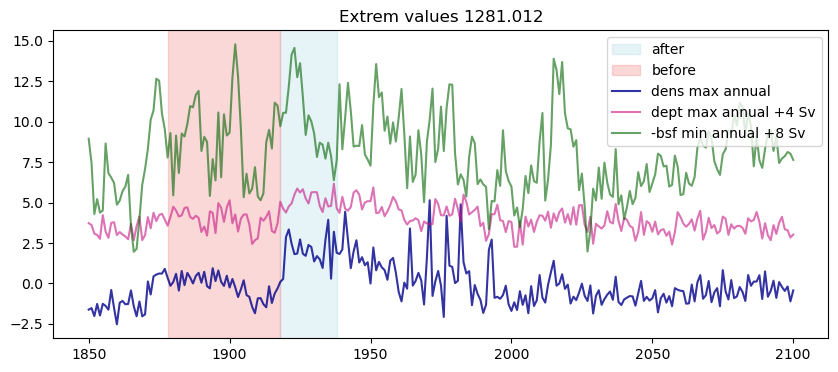

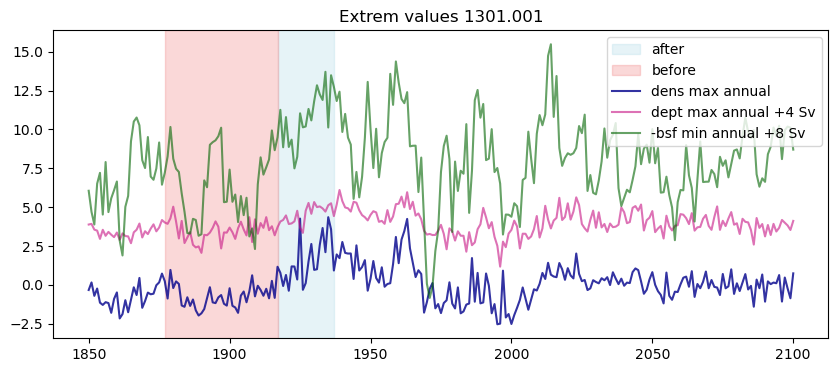

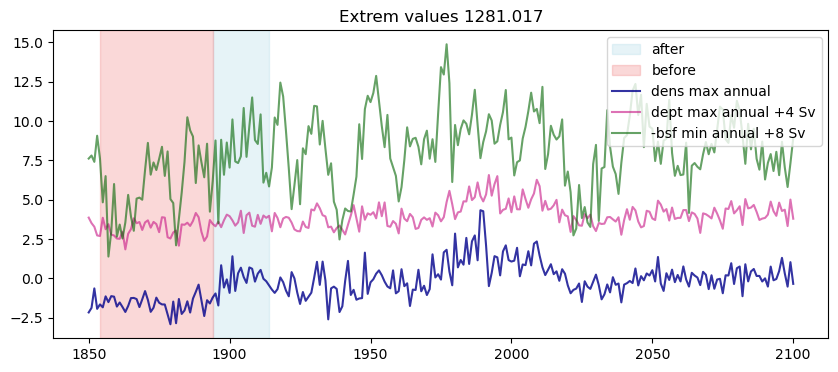

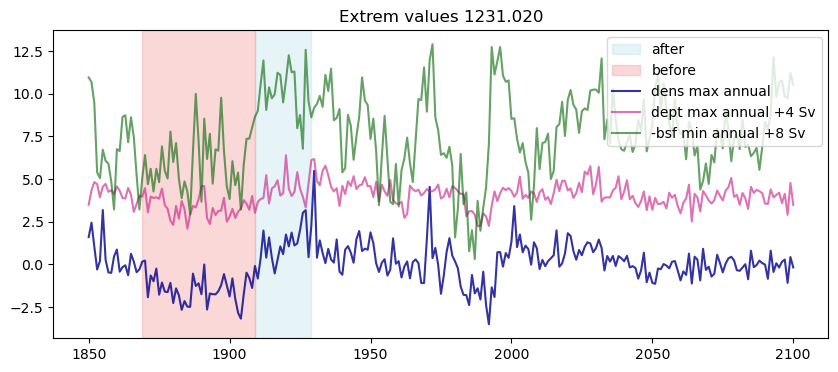

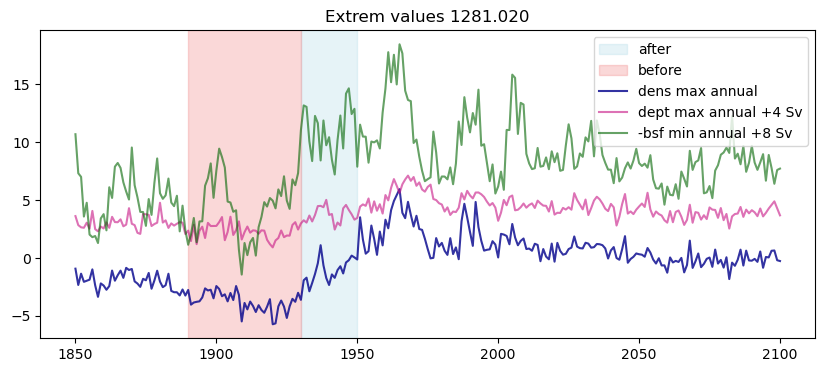

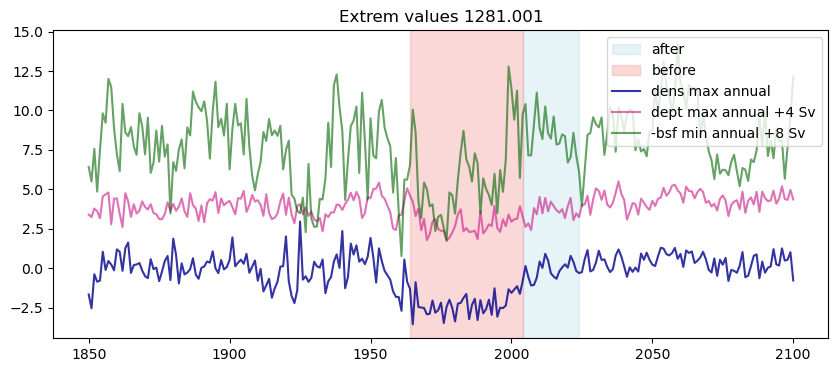

In [7]:
for i in [8,12,13,16,27,45]:
    vvel_number = i
    
    # find event
    event = criteria_indices_dict[vvel_number][0]
    bsf_number, bsf_filename = find_corresponding_bsf_number(vvel_number)

    ## Load data and compute monthly time series
    dens_max = np.load(files_demean[3])[:,vvel_number]
    dens_max_annual = annual_from_monthly(dens_max)

    dept_max = np.load(files_demean[4])[:,vvel_number]
    dept_max_annual = annual_from_monthly(dept_max)

    bsf_min = np.load(files_demean[2])[:,bsf_number]
    bsf_min_annual = annual_from_monthly(bsf_min)
    
    # add year to to data to plot event
    start = event+1850

    plt.figure(figsize=(10, 4))
    
    plt.axvspan(start, start+20, alpha=0.3, color='lightblue', label='after')
    plt.axvspan(start-40, start, alpha=0.3, color='lightcoral', label='before')

    plt.plot(time_annual, dens_max_annual, label='dens max annual', alpha = 0.8, color='darkblue')
    plt.plot(time_annual, dept_max_annual+4, label='dept max annual +4 Sv', alpha = 0.6, color='mediumvioletred')
    plt.plot(time_annual, -bsf_min_annual+8, label='-bsf min annual +8 Sv', alpha = 0.6, color='darkgreen')

    plt.title('Extrem values ' + bsf_filename[4:-3])

    plt.legend(loc = 'upper right')
    #plt.show()
    plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'max_metrics_ts_'+str(vvel_number)+'.png', bbox_inches='tight')

# Inspect event

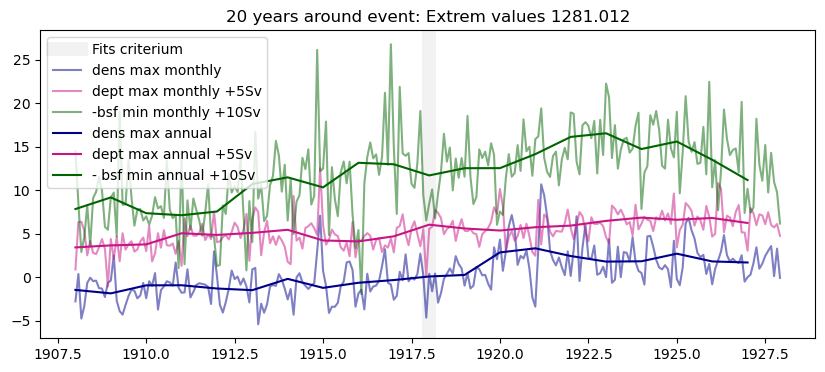

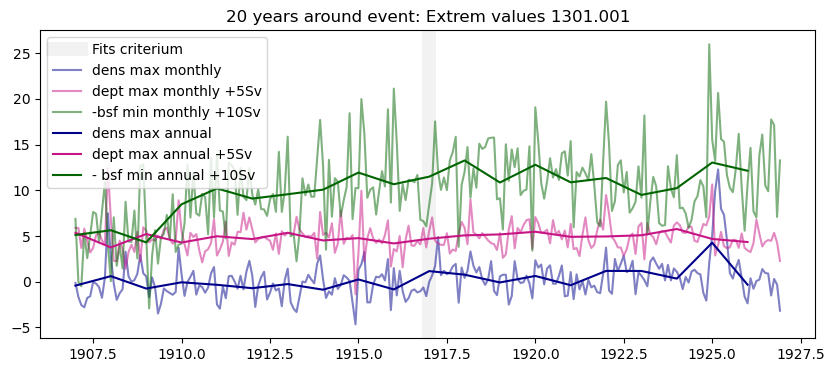

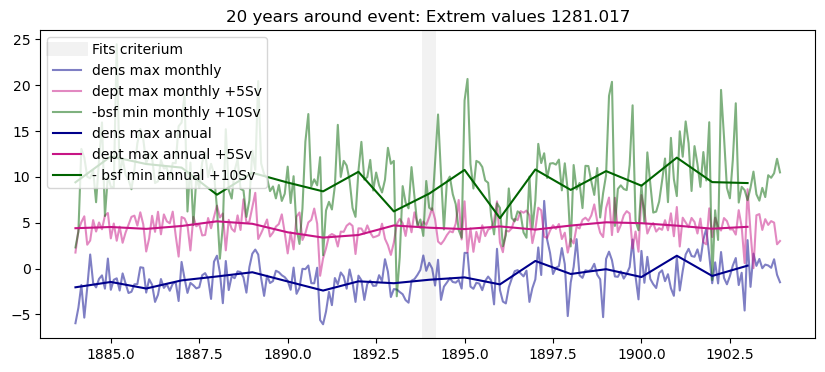

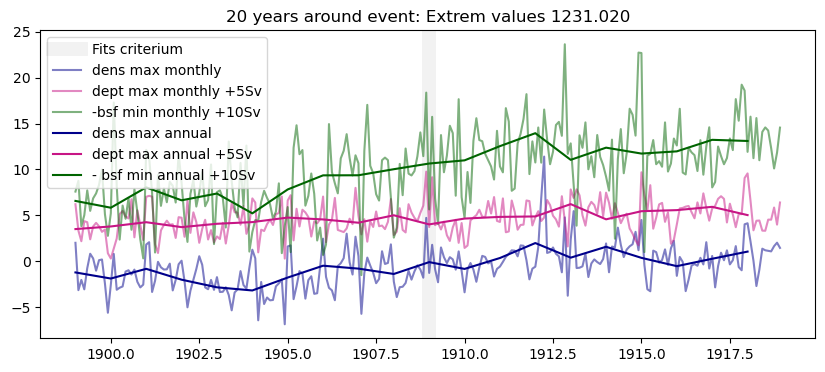

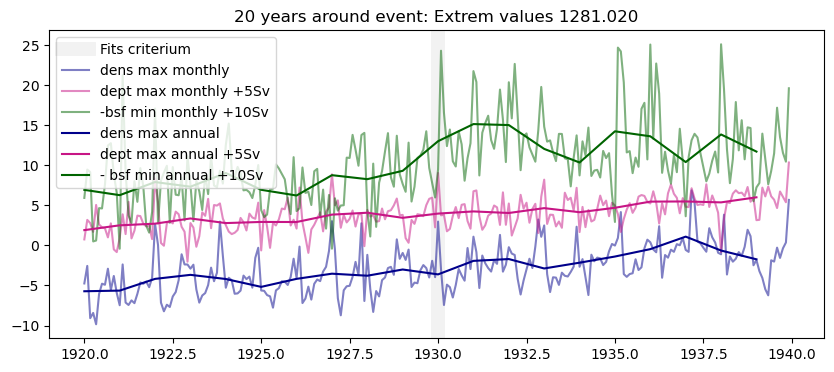

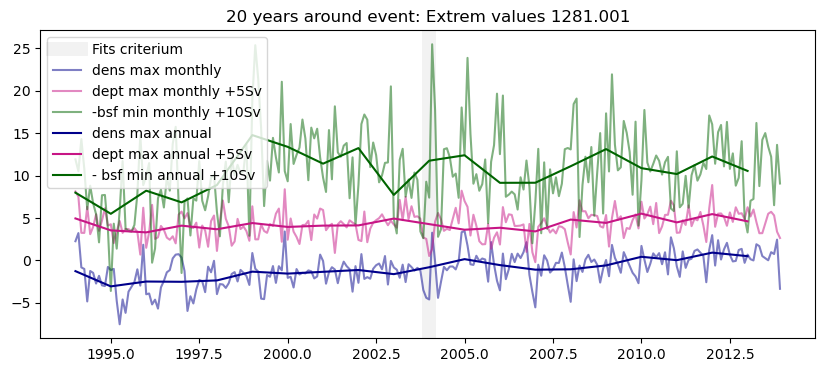

In [8]:
for i in [8,12,13,16,27,45]:
    vvel_number = i
    
    # find event
    event = criteria_indices_dict[vvel_number][0]
    bsf_number, bsf_filename = find_corresponding_bsf_number(vvel_number)

    ## Load data and compute monthly time series
    
    bsf_min = np.load(files_demean[2])[:,bsf_number]
    bsf_min_annual = annual_from_monthly(bsf_min)
    
    dens_max = np.load(files_demean[3])[:,vvel_number]
    dens_max_annual = annual_from_monthly(dens_max)

    dept_max = np.load(files_demean[4])[:,vvel_number]
    dept_max_annual = annual_from_monthly(dept_max)


    plt.figure(figsize=(10, 4))

    plt.axvline(x=event+1850, color='gray', label='Fits criterium', alpha = 0.1,linewidth=10)

    plt.plot(time[(event*12)-(before*12):(event*12)+(after*12)], dens_max[(event*12)-(before*12):(event*12)+(after*12)], label='dens max monthly', alpha = 0.5, color='darkblue')
    plt.plot(time[(event*12)-(before*12):(event*12)+(after*12)], dept_max[(event*12)-(before*12):(event*12)+(after*12)]+5, label='dept max monthly +5Sv', alpha = 0.5, color='mediumvioletred')
    plt.plot(time[(event*12)-(before*12):(event*12)+(after*12)], -bsf_min[(event*12)-(before*12):(event*12)+(after*12)]+10, label='-bsf min monthly +10Sv', alpha = 0.5, color='darkgreen')

    plt.title('20 years around event: Extrem values ' + bsf_filename[4:-3])

    plt.plot(time_annual[event-before:event+after], dens_max_annual[event-before:event+after], label='dens max annual', color='darkblue')
    plt.plot(time_annual[event-before:event+after], dept_max_annual[event-before:event+after]+5, label='dept max annual +5Sv', color='mediumvioletred')
    plt.plot(time_annual[event-before:event+after], -bsf_min_annual[event-before:event+after]+10, label='- bsf min annual +10Sv', color='darkgreen')

    plt.legend(loc = 'upper left')
    #plt.show()
    plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'max_metrics_event_'+str(vvel_number)+'.png', bbox_inches='tight')

In [9]:
## Load data and compute monthly time series

OSNAPeast = np.load(files_demean[0])[:,bsf_number]
OSNAPeast_annual = annual_from_monthly(OSNAPeast)

OSNAPwest = np.load(files_demean[1])[:,bsf_number]
OSNAPwest_annual = annual_from_monthly(OSNAPwest)

bsf_min = np.load(files_demean[2])[:,bsf_number]
bsf_min_annual = annual_from_monthly(bsf_min)

dens_max = np.load(files_demean[3])[:,vvel_number]
dens_max_annual = annual_from_monthly(dens_max)

dept_max = np.load(files_demean[4])[:,vvel_number]
dept_max_annual = annual_from_monthly(dept_max)

rapi_dens = np.load(files_demean[5])[:,vvel_number]
rapi_dens_annual = annual_from_monthly(rapi_dens)

rapi_dept = np.load(files_demean[6])[:,vvel_number]
rapi_dept_annual = annual_from_monthly(rapi_dept)

spgy_dens = np.load(files_demean[7])[:,vvel_number]
spgy_dens_annual = annual_from_monthly(spgy_dens)

spgy_dept = np.load(files_demean[8])[:,vvel_number]
spgy_dept_annual = annual_from_monthly(spgy_dept)

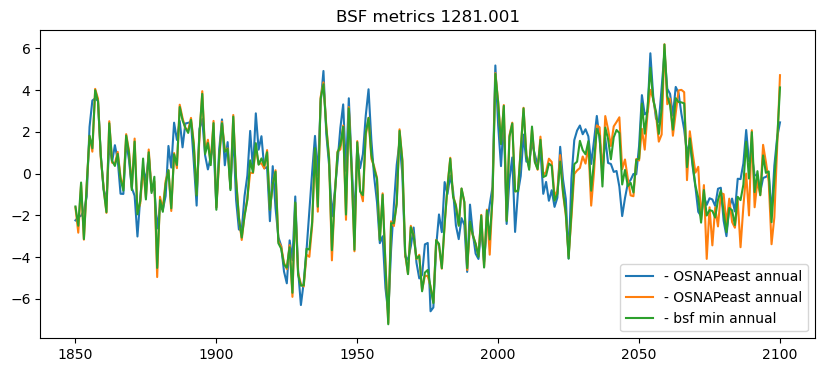

In [10]:
plt.figure(figsize=(10, 4))

plt.title('BSF metrics ' + bsf_filename[4:-3])

plt.plot(time_annual, -OSNAPeast_annual, label='- OSNAPeast annual')
plt.plot(time_annual, -OSNAPwest_annual, label='- OSNAPeast annual')
plt.plot(time_annual, -bsf_min_annual, label='- bsf min annual')

plt.legend()
#plt.show()

plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'bsf_metrics_ts_'+str(vvel_number)+'.png', bbox_inches='tight')

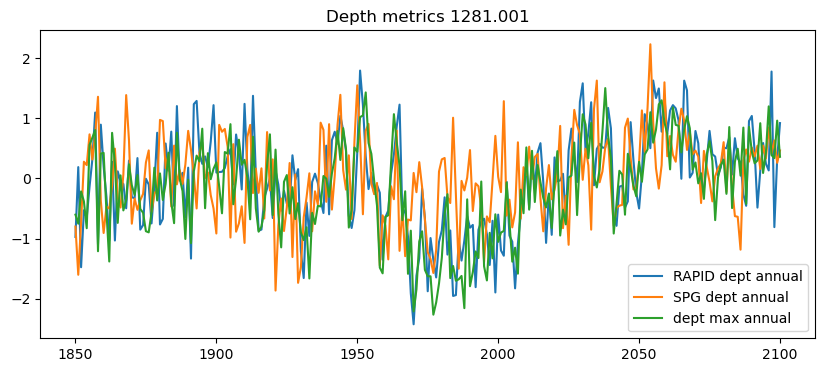

In [11]:
plt.figure(figsize=(10, 4))

plt.title('Depth metrics ' + bsf_filename[4:-3])

plt.plot(time_annual, rapi_dept_annual, label='RAPID dept annual')
plt.plot(time_annual, spgy_dept_annual, label='SPG dept annual')
plt.plot(time_annual, dept_max_annual, label='dept max annual')

plt.legend()
#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'dep_metrics_ts_'+str(vvel_number)+'.png', bbox_inches='tight')

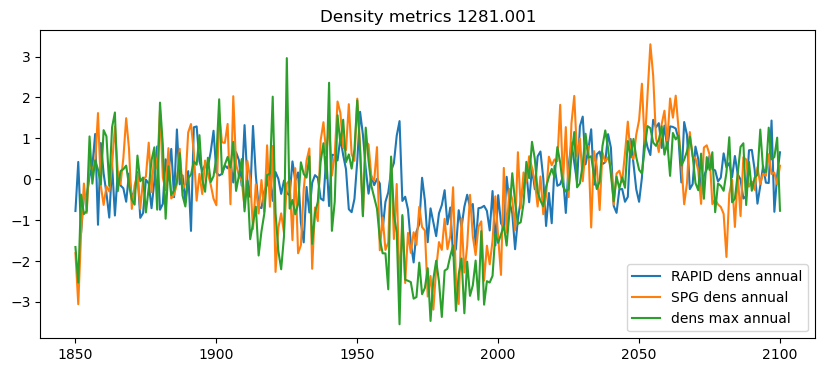

In [12]:
plt.figure(figsize=(10, 4))

plt.title('Density metrics ' + bsf_filename[4:-3])

plt.plot(time_annual, rapi_dens_annual, label='RAPID dens annual')
plt.plot(time_annual, spgy_dens_annual, label='SPG dens annual')
plt.plot(time_annual, dens_max_annual, label='dens max annual')

plt.legend()
#plt.show()
plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'den_metrics_ts_'+str(vvel_number)+'.png', bbox_inches='tight')

# Print non-demeaned time series

In [13]:
files_raw

['/home/innag3580/phase1_CONDA/timeseries/OSNAPeast_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/OSNAPwest_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/bsf_min_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/maxi_dens_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/maxi_dept_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/rapi_dens_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/rapi_dept_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/spgy_dens_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/spgy_dept_time_series.npy']

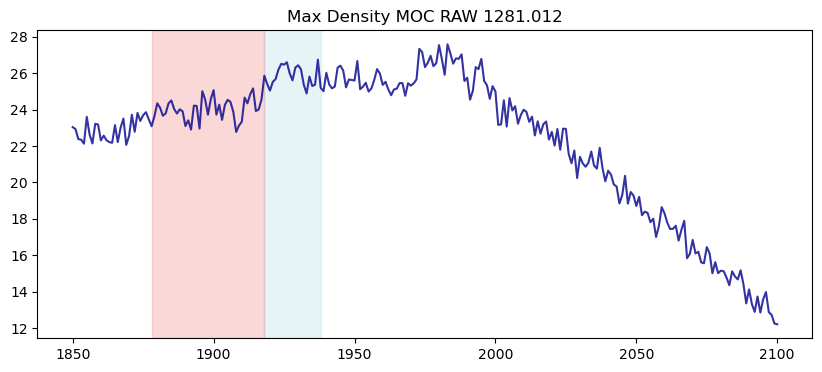

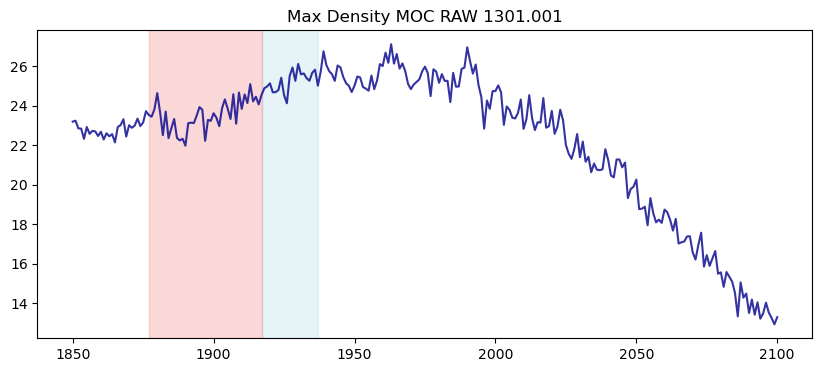

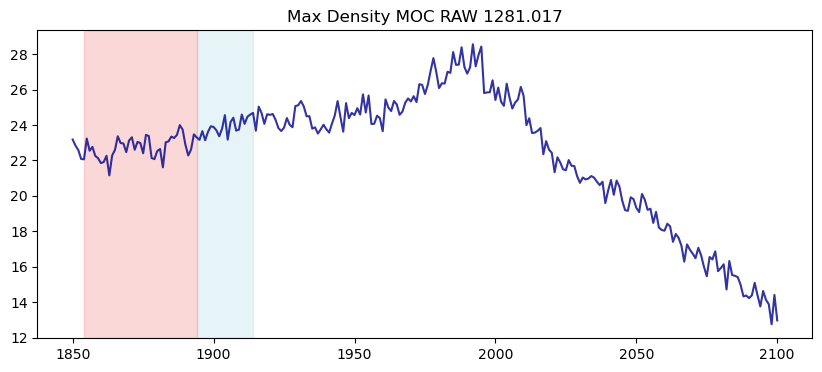

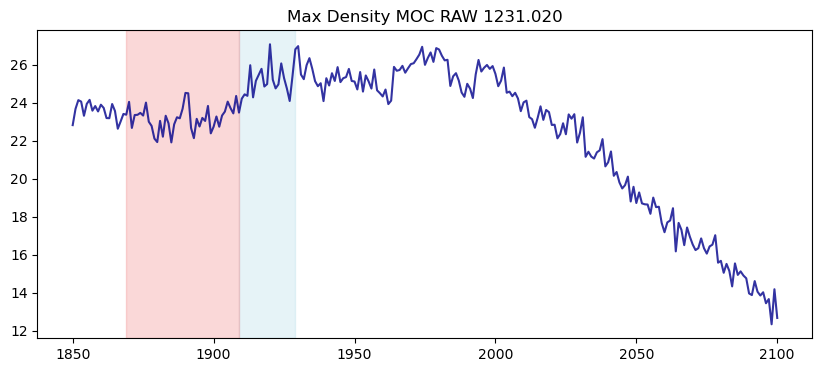

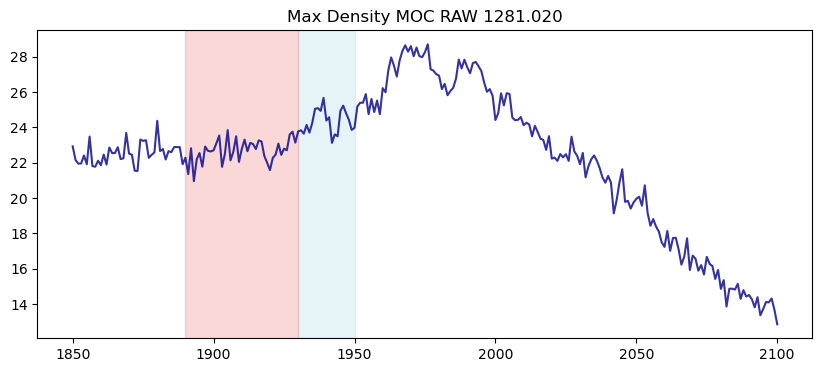

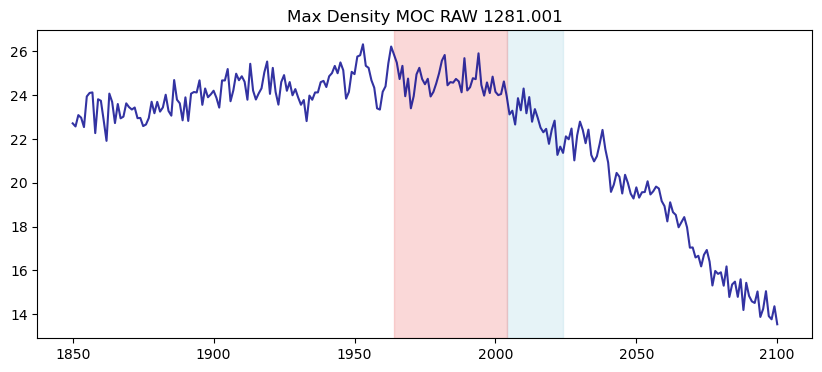

In [14]:
## Load data and compute monthly time series

for i in [8,12,13,16,27,45]:
    vvel_number = i
    
    # find event
    event = criteria_indices_dict[vvel_number][0]
    bsf_number, bsf_filename = find_corresponding_bsf_number(vvel_number)

    dens_raw_max = np.load(files_raw[4])[:,vvel_number]
    dens_raw_max_annual = annual_from_monthly(dens_raw_max)
    
    # add year to to data to plot event
    start = event+1850

    plt.figure(figsize=(10, 4))
    
    plt.axvspan(start, start+20, alpha=0.3, color='lightblue', label='after')
    plt.axvspan(start-40, start, alpha=0.3, color='lightcoral', label='before')

    plt.title('Max Density MOC RAW ' + bsf_filename[4:-3])

    plt.plot(time_annual, dens_raw_max_annual, color="darkblue", alpha=0.8)

    #plt.legend()
    #plt.show()
    plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'raw_den_metrics_ts_'+str(vvel_number)+'.png', bbox_inches='tight')

# Plot ensemble mean

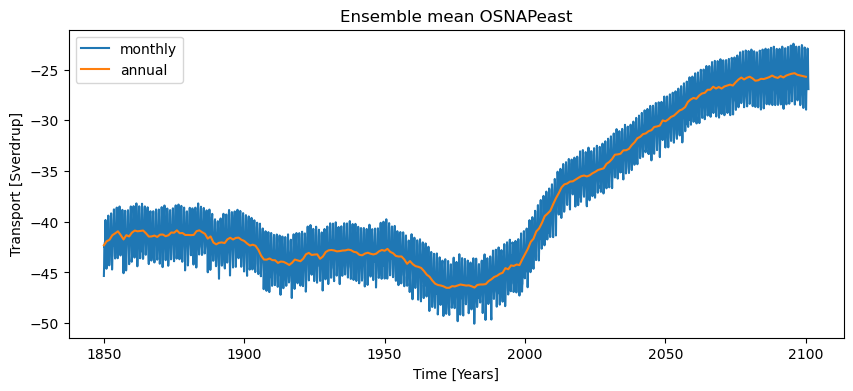

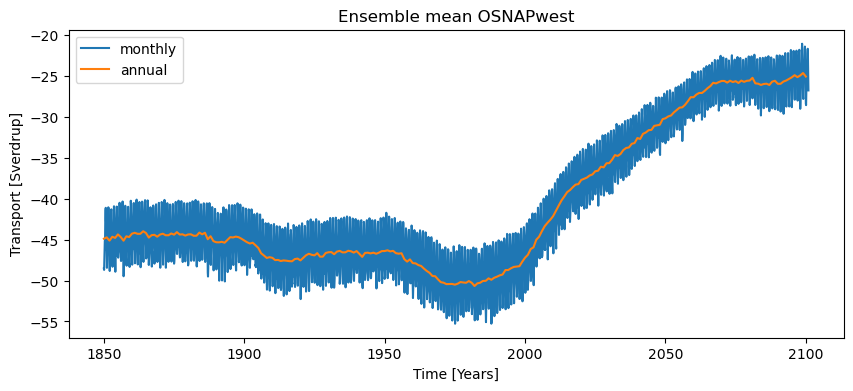

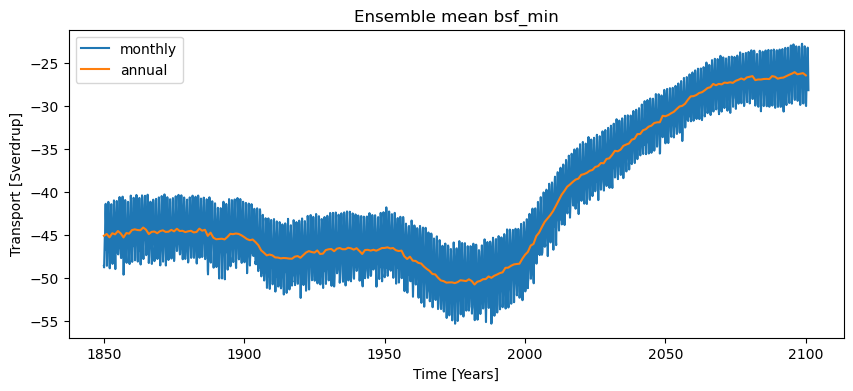

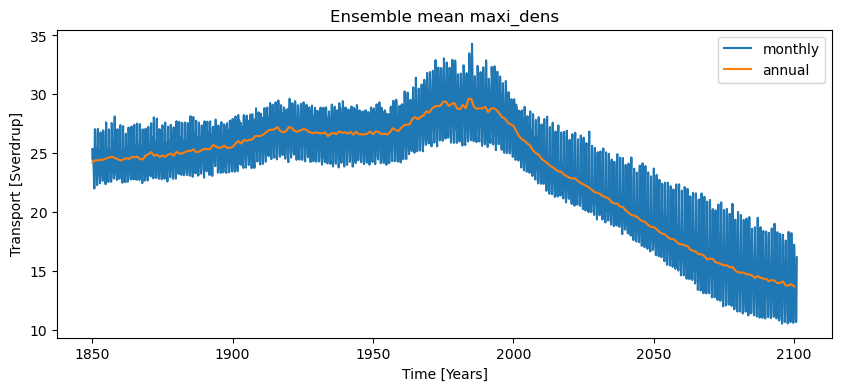

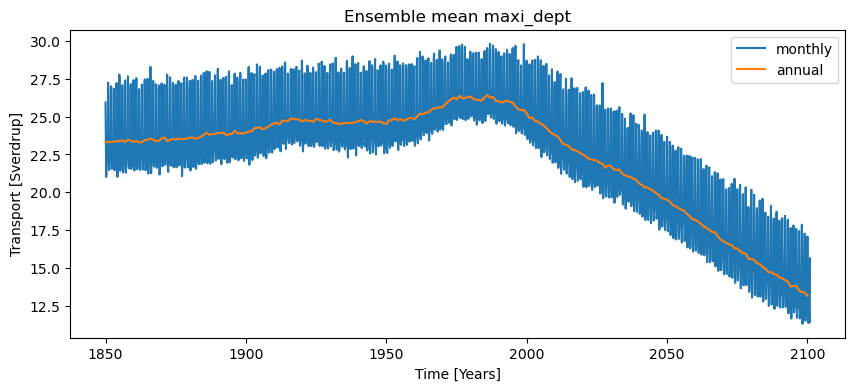

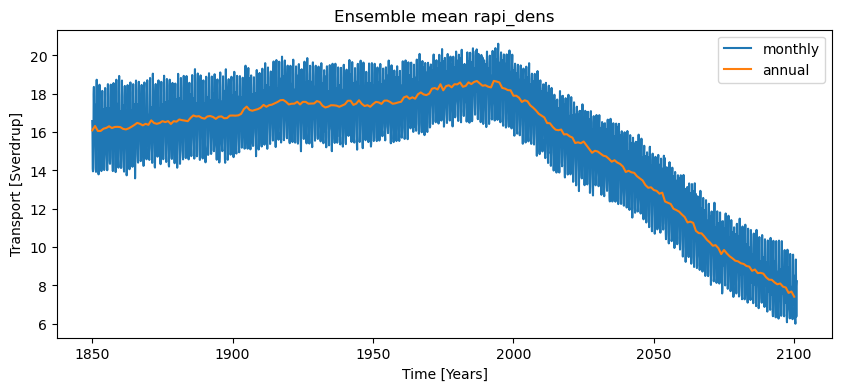

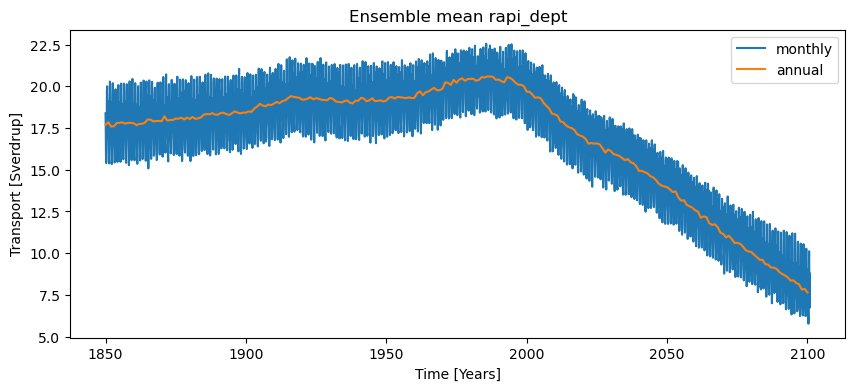

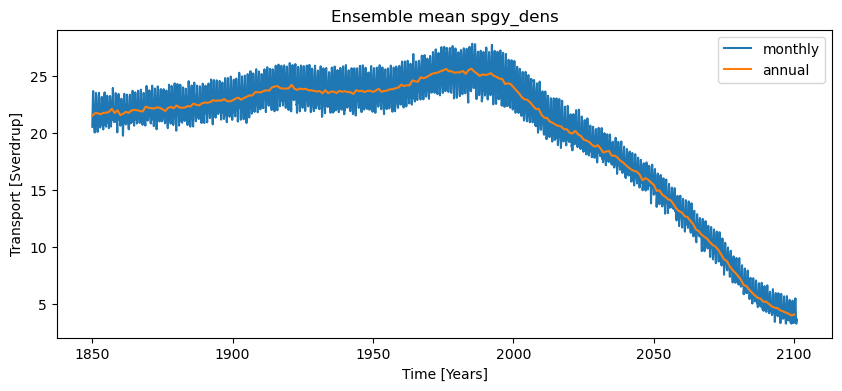

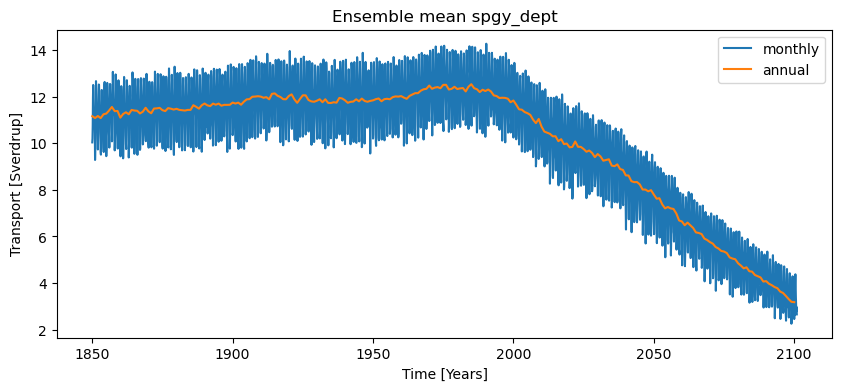

In [18]:
for i in range(len(files_ensemble_mean)):
    ense = np.load(files_ensemble_mean[i])
    ense_annual = annual_from_monthly(ense)
    
    plt.figure(figsize=(10, 4))

    plt.title('Ensemble mean '+files_ensemble_mean[i][54:-4])

    plt.plot(time, ense, label='monthly')
    plt.plot(time_annual, ense_annual, label='annual')

    plt.ylabel('Transport [Sverdrup]')
    plt.xlabel('Time [Years]')

    plt.legend()
    plt.show()
    #plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'ensemble_mean_'+files_ensemble_mean[i][54:-4]+'.png', bbox_inches='tight')

# Perform rolling window on ensemble mean

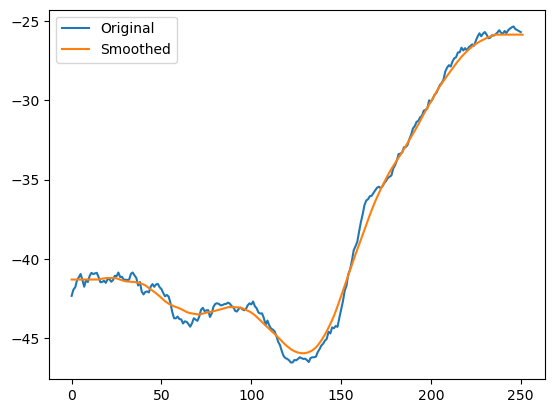

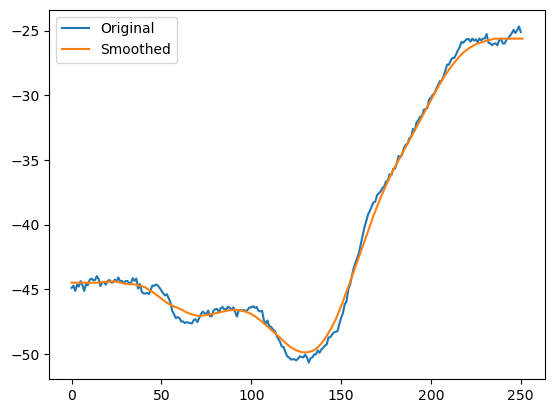

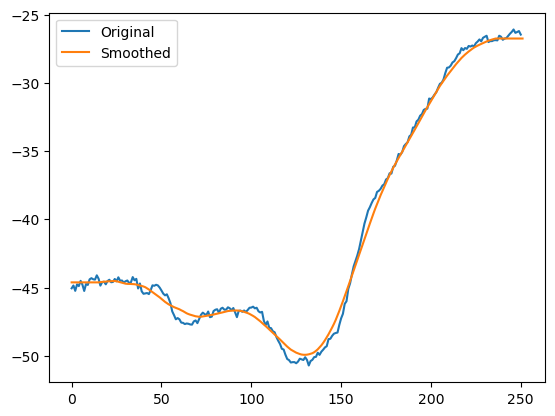

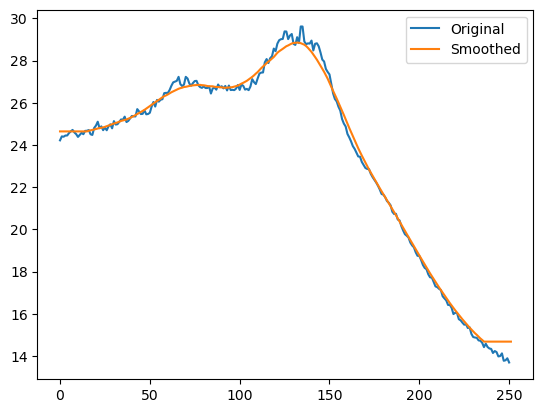

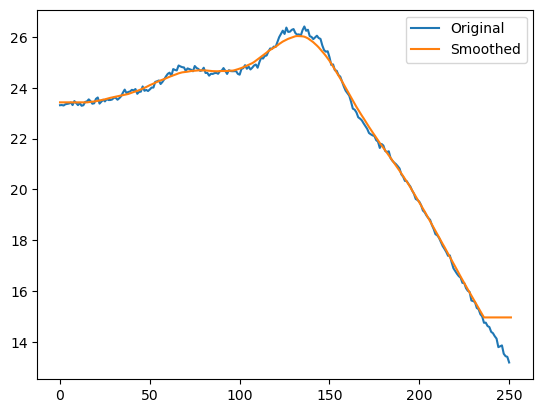

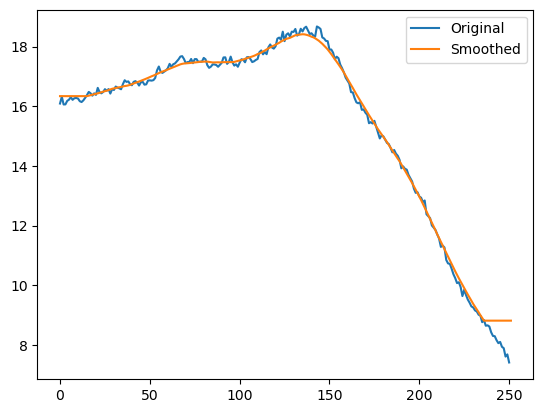

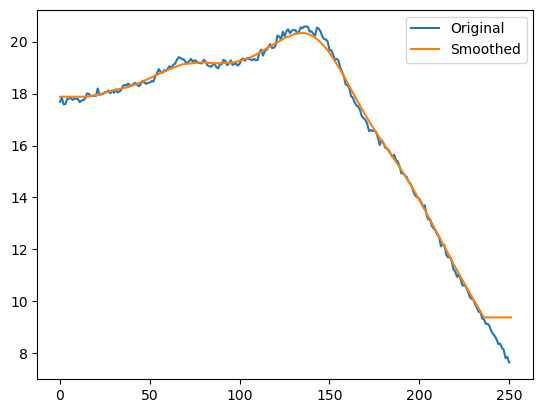

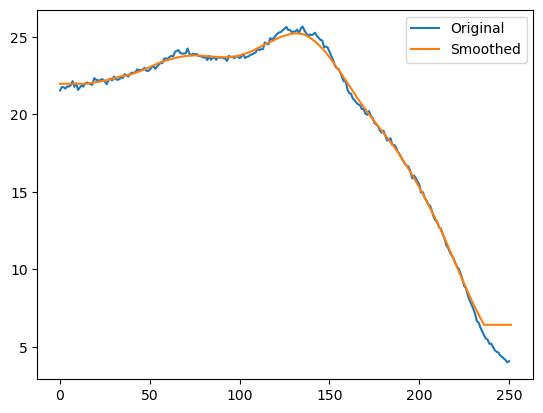

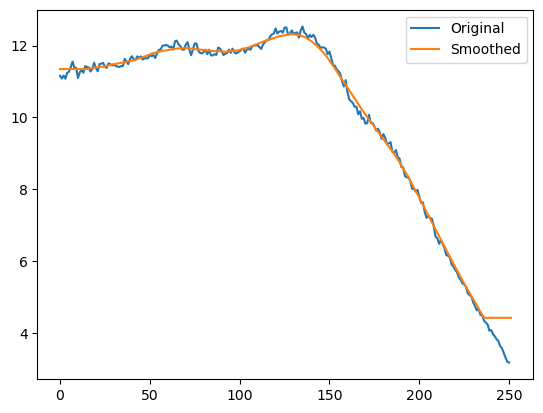

In [33]:
for i in range(len(files_ensemble_mean)):
    ense = np.load(files_ensemble_mean[i])
    ense_annual = annual_from_monthly(ense)
    
    # Define the window for the running mean
    window_size = 30
    window = np.ones(window_size) / window_size

    # Calculate the running mean using numpy.convolve
    running_mean = np.convolve(ense_annual, window, mode='same')

    # Define the boxcar filter
    boxcar = np.ones(30) / 30

    # Apply the filter using numpy.convolve with mode='valid'
    smoothed_data = np.convolve(ense_annual, boxcar, mode='valid')
    smoothed_data = np.concatenate(([smoothed_data[0]] * 15, smoothed_data, [smoothed_data[-1]] * 15)

    # Plot the original and smoothed time series
    plt.figure(figsize=(10, 4))

                   
    plt.plot(ense_annual, label='Original')
    plt.plot(smoothed_data, label='Smoothed')
    
    plt.title('Smoothes ensemble mean '+files_ensemble_mean[i][54:-4])                               
    plt.ylabel('Transport [Sverdrup]')
    plt.xlabel('Time [Years]')
    plt.legend()
                                   
    plt.show()
    #plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'ensemble_mean_'+files_ensemble_mean[i][54:-4]+'.png', bbox_inches='tight')